In [8]:
import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG' #google stock
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
#stock market data for the google (data of past 10 years)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [6]:
#reset the index of the data to normal index instead of date as index
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2758,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [7]:
# moving averages strategy ---> 100 days (naive price)
ma_100_days = data.Close.rolling(100).mean()

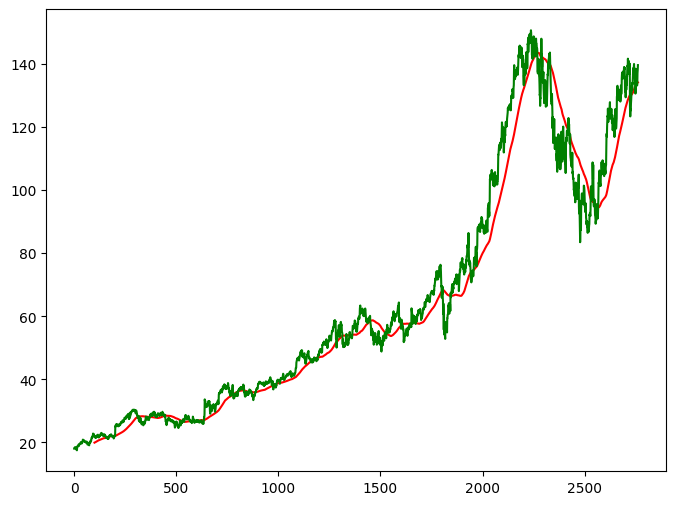

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
#calculate the moving average for the 200 days
ma_200_days = data.Close.rolling(200).mean()

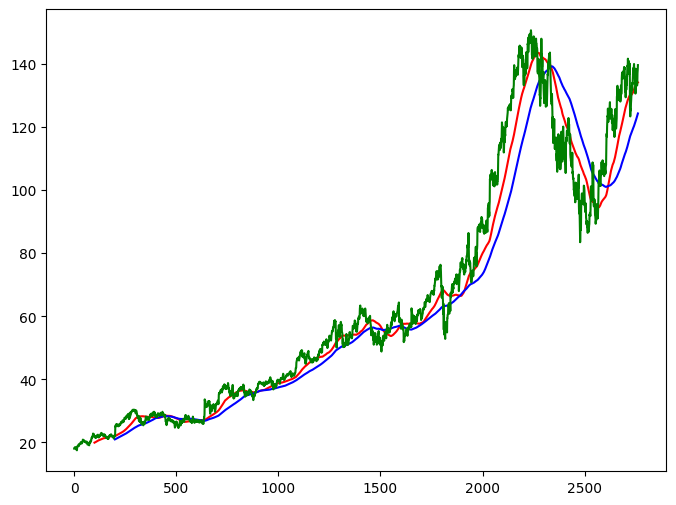

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [14]:
#clean the data if there is any null value
data.dropna(inplace=True)


In [23]:
#dividing the 80 percent into training data and 20 percent into test data
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [24]:
data_train.shape

(2209, 1)

In [25]:
data_test.shape

(553, 1)

In [26]:
#scaling data in between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)

In [28]:
x = []
y = []
#taking the previous 100 data values to calculate the next 101th data
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [31]:
x, y = np.array(x), np.array(y)

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam


In [43]:
model =  Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),
    LSTM(units=120, activation='relu', return_sequences=True),
    Dropout(0.5),
    Dense(units=1)
    
])

AttributeError: module 'keras.src.backend' has no attribute 'Variable'

In [41]:
model = Sequential()

# Ensure that the input shape matches the shape of your input data
# Assuming x.shape[1] is the number of features in your input data
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Use linear activation function for regression tasks
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

AttributeError: module 'keras.src.backend' has no attribute 'Variable'